In [1]:
import PIL
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import h5py
import os
#from helper_functions import *

In [3]:
!pwd

/home/batman/Documents/cs282a/proj/test_model


In [25]:
test_image = torch.load('./datasets/AB_normalize/train/7349.pt')
test_image.shape

torch.Size([640, 736])

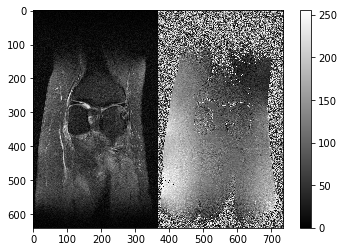

In [11]:
plt.imshow(test_image, cmap='gray')
plt.colorbar()
plt.show()

In [232]:
np_test_image = np.array(test_image)
print(np_test_image.dtype)
new_image = F.to_pil_image(np_test_image)


float32


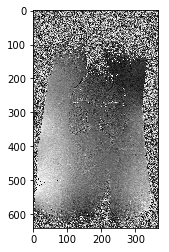

In [43]:
w, h = new_image.size
w2 = int(w/2)
A = new_image.crop((0,0,w2,h))
B = new_image.crop((w2,0,w,h))

plt.imshow(B)

In [55]:
a = torch.tensor([[1, 3], [2,4]])
a = a.type(torch.complex128)
a.imag = a.imag + 1e-5
b = torch.tensor([[7+4j, 5-2j], [-3+8j, 6-7j]])

print(a)
print(b)

tensor([[1.+1.0000e-05j, 3.+1.0000e-05j],
        [2.+1.0000e-05j, 4.+1.0000e-05j]], dtype=torch.complex128)
tensor([[ 7.+4.j,  5.-2.j],
        [-3.+8.j,  6.-7.j]])


In [56]:
ab = torch.cat((a, b), 1)
print(ab)
print(ab.real)
print(ab.imag)

tensor([[ 1.+1.0000e-05j,  3.+1.0000e-05j,  7.+4.0000e+00j,  5.-2.0000e+00j],
        [ 2.+1.0000e-05j,  4.+1.0000e-05j, -3.+8.0000e+00j,  6.-7.0000e+00j]],
       dtype=torch.complex128)
tensor([[ 1.,  3.,  7.,  5.],
        [ 2.,  4., -3.,  6.]], dtype=torch.float64)
tensor([[ 1.0000e-05,  1.0000e-05,  4.0000e+00, -2.0000e+00],
        [ 1.0000e-05,  1.0000e-05,  8.0000e+00, -7.0000e+00]],
       dtype=torch.float64)


/home/batman/Documents/cs282a/proj/test_model/fastMRI
tensor(1.)


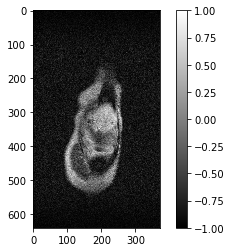

In [18]:
!pwd
A = torch.load('/home/batman/Documents/cs282a/proj/test_model/datasets/A/train/3814.pt')
A_norm = 2 *((A - A.min()) / (A.max() - A.min())) -1
#kspace_test = fft2c(A)
print(A_norm.max())
plt.imshow(A_norm, cmap='gray')
plt.colorbar()
plt.show()

In [61]:
!pwd

/home/batman/Documents/cs282a/proj/test_model


torch.float32
tensor(-0.0013)
tensor(0.)


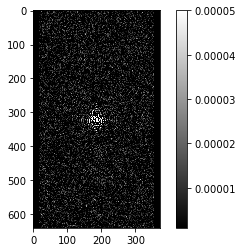

In [103]:
K = torch.load('/home/batman/Documents/cs282a/proj/test_model/datasets/K/train/3814.pt')
#K[K < 0] = 0
K_previous_norm = ((K - K.min()) / K.max() - K.min()) * 255
K_log = np.log(np.abs(K) + 1e-31)
print(K.dtype)
print(K.min())
K_norm = ((K_log - K_log.min()) / (K_log.max() - K_log.min())) * 255
print(K_norm.min())
#K_lewis = fastmri.ifft2c(K[:,:,0])
plt.imshow(K[:,:,0], cmap='gray', vmin=1e-6, vmax=5e-5)
plt.colorbar()
plt.show()

In [450]:
K_np = K.numpy()
#print(K_np.shape)
kspace_mag_convert = F.to_pil_image(np.array(K[:,:,0]))
kspace_phase_convert = F.to_pil_image(np.array(K[:,:,1]))
# kspace_mag_convert_type = kspace_mag_convert.convert('L')
# kspace_phase_convert_type = kspace_phase_convert.convert('L')

K_pil_object = Image.fromarray(K_np[:,:,0])
K_pil_object2 = transforms.ToPILImage("LA")(K_np)

print(K.shape)
test = torch.movedim(K, (2,2), (0,1))
    
#kspace_convert = Image.merge("LA", [kspace_mag_convert_type, kspace_phase_convert_type])

kspace_mag = np.array(kspace_mag_convert)
kspace_phase = np.array(kspace_phase_convert)
#print(kspace_mag.dtype)
#print(kspace_mag.shape)
kspace_mag_tensor = torch.tensor(kspace_mag)
kspace_phase_tensor = torch.tensor(kspace_phase)

kspace = torch.stack((kspace_mag_tensor, kspace_phase_tensor))
kspace = kspace.permute(1,2,0)
#print(kspace.shape)
#lewis = ifft2c(kspace)
#lewis = torch.tensor(K_pil_object)
#plt.imshow(torch.tensor(K_pil_object))
#plt.imshow(ifft2c(K)[:,:,0])
#lewis = np.array(kspace_convert)
#print(lewis.dtype)
#lewis_tensor = torch.tensor(lewis)
#kspace_convert.show()
# plt.imshow(ifft2c(kspace)[:,:,0])
# plt.colorbar()
# plt.show()

torch.Size([640, 372, 2])


RuntimeError: movedim: repeated dim in `source` ([2, 2])

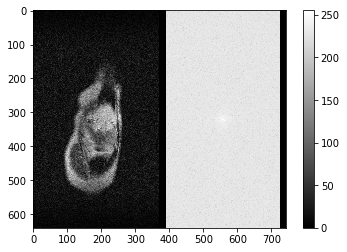

In [213]:


mag_combined = torch.cat((A_norm, K_norm[:,:,0]), 1)

plt.imshow(mag_combined, cmap='gray')
plt.colorbar()
plt.show()

torch.Size([640, 372])


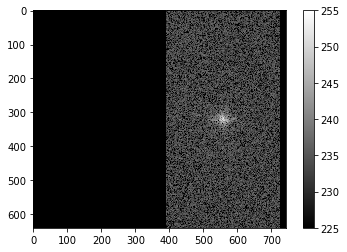

In [216]:
phase_dummy = torch.ones_like(K[:,:,1]) * 127
print(phase_dummy.shape)

K_norm = ((K_log[:,:,1] - K_log[:,:,1].min()) / (K_log[:,:,1].max() - K_log[:,:,1].min())) * 255

phase_combined = torch.cat((phase_dummy, K_phase_norm), 1)
plt.imshow(phase_combined, vmin=225, vmax=255, cmap='gray')
plt.colorbar()
plt.show()

torch.Size([2, 640, 744])
float32


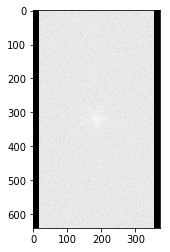

In [249]:
#stack mag and phase into 2 channels
input_stack = torch.stack([mag_combined,phase_combined])
input_stack_permute = input_stack.permute(1,2,0)
print(input_stack.shape)
print(np.array(input_stack).dtype)

convert_test = F.to_pil_image(np.array(input_stack_permute[:,:,1]))

w, h = convert_test.size
w2 = int(w/2)
A = convert_test.crop((0,0,w2,h))
B = convert_test.crop((w2,0,w,h))
plt.imshow(B)

# !!!!! VISUALIZE SAVED IMAGES PER EPOCH !!!!!

In [2]:
os.chdir('/home/batman/Documents/cs282a/proj/test_model/fastMRI')
!pwd

/home/batman/Documents/cs282a/proj/test_model/fastMRI


In [3]:
from fastmri.data import transforms, mri_data
from fastmri import ifft2c, complex_abs, fft2c

In [ ]:
#K[K<0] = 0
#print(K[:,:,0])
K_normalized = (K - K.min()) / (K.max() - K.min()) * 255
K_retrieve = (K_normalized/255) * (K.max() - K.min()) + K.min()
print(K.shape)
test = ifft2c(K)
print('kspace -> ifft shape:',test.shape)
test_norm = ((test - test.min()) / (test.max() - test.min())) * 255
print(test_norm.max())
plt.imshow(test_norm[:,:,1], cmap='gray')
plt.colorbar()
print(K[:,:,1])
#histogram = np.histogram(np.array(test[:,:,0]))
#plt.hist(histogram)
plt.show()

### Load in the saved dictionary of image tensors from the checkpoints/model folder

torch.Size([1, 1, 256, 256])


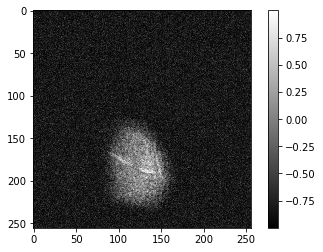

In [569]:
epoch1_dict = torch.load('/home/batman/Documents/cs282a/proj/test_model/checkpoints/mag2kspace_pix2pix/epoch_170_dictionary.pt')
real_A = epoch1_dict['real_A'].detach().cpu()
print(real_A.shape)
plt.imshow(real_A[0,0,:,:], cmap='gray')
plt.colorbar()
plt.show()

torch.Size([1, 2, 256, 256])
torch.Size([256, 256, 2])


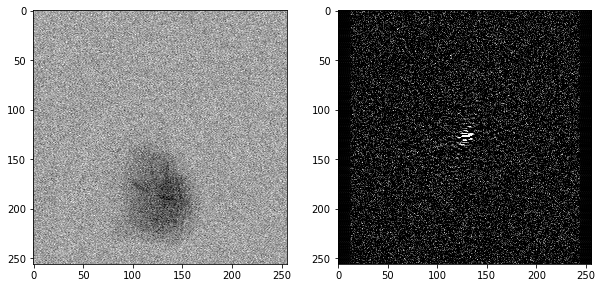

In [570]:
real_B = epoch1_dict['real_B'].detach().cpu()
print(real_B.shape)
real_B = real_B.permute(0,2,3,1)
kspace = real_B
fft_form = fft2c(real_B)[0,:,:,:]
print(fft_form.shape)

f = plt.figure(figsize=(10,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
#plt.imshow(fft_form[:,:,1], cmap='gray', vmin=0, vmax=0.5)
ax1.imshow(real_B[0,:,:,1], cmap='gray')#, vmin=0, vmax=0.5)
# plt.colorbar()
# plt.show()

ax2.imshow(fft_form[:,:,1], cmap='gray', vmin=0, vmax=0.5)
# plt.colorbar()
# plt.show()

torch.Size([1, 256, 256, 2])
torch.Size([256, 256, 2])


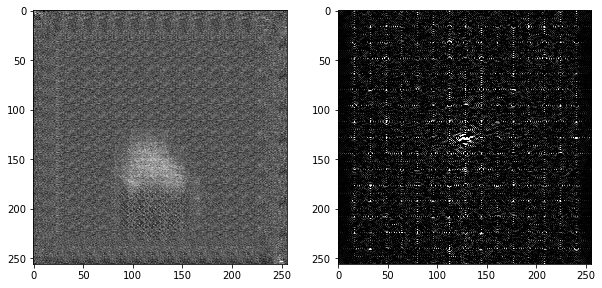

In [571]:
fake_B = epoch1_dict['fake_B'].detach().cpu()
#print(fake_B.shape)
fake_B = fake_B.permute(0,2,3,1)
print(fake_B.shape)
fft_form_fake = ifft2c(fake_B[0,:,:,:])
log_fft_form_fake = torch.log(fft_form_fake)
print(fft_form_fake.shape)

f = plt.figure(figsize=(10,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(fake_B[0,:,:,1], cmap='gray')
#plt.imshow(fft_form_fake[:,:,1], cmap='gray', vmin=0, vmax=0.5)
# plt.colorbar()
# plt.show()
ax2.imshow(fft_form_fake[:,:,1], cmap='gray', vmin=0, vmax=0.5)

In [341]:
#torch.equal(real_A[0,0,:,:], real_B[0,:,:,0])
#torch.equal(real_B[0,:,:,0], fake_B[0,:,:,0])
torch.equal(fake_B[0,:,:,1], fake_B[0,:,:,0])
#torch.equal(fft2c(real_B)[0,:,:,1], fft_form_fake[:,:,1])

False

tensor(0.1411)


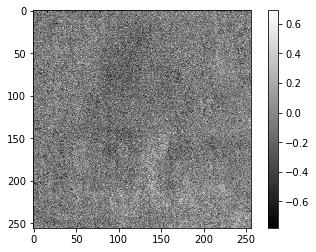

In [414]:
# image space error calculations
#kspace_error = fft2c(real_B)[0,:,:,1] - fft_form_fake[:,:,1]
ispace_error = (real_B[0,:,:,1] - fake_B[0,:,:,1])
sqerror = torch.pow(ispace_error, 2)
mse = torch.mean(sqerror)
rmse = mse.sqrt()
nrmse = rmse/(fake_B[0,:,:,1].max() - fake_B[0,:,:,1].min())
print(nrmse)
#plt.imshow(ispace_error, cmap='gray')
plt.imshow(ispace_error, cmap='gray')
plt.colorbar()
plt.show()

In [349]:
#kspace error calculations (incomplete)
real_B = real_B.squeeze(0)
print(real_B.shape)
fake_B = fake_B.squeeze(0)
print(fake_B.shape)

real_B_convert = torch.complex(real_B[:,:,0], real_B[:,:,1])

mae_kspace_mag = ((1/256)**2) * torch.abs(fake_B[:,:,0] - real_B[:,:,0])
mae_kspace_phase = ((1/256)**2) * torch.abs(fake_B[:,:,1] - real_B[:,:,0])
#print(mae_kspace_phase)

torch.Size([256, 256, 2])
torch.Size([256, 256, 2])
torch.Size([256, 256, 2])
